<a href="https://colab.research.google.com/github/ribesstefano/GPU-accelerated-Finite-Element-Method-using-Python-and-CUDA/blob/main/TRA105_Sparse_Linear_Solver_Profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade matplotlib==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 2.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
csv_data = \
'''Solver,lcar,n_nodes,Number of Cells,n_runs,CPU/GPU,Execution Time [s]
spsolve,0.5,29,38,20,CPU,0.0001
bicg,0.5,29,38,20,CPU,0.0017
bicgstab,0.5,29,38,20,CPU,0.0012
cg,0.5,29,38,20,CPU,0.0010
cgs,0.5,29,38,20,CPU,0.0013
gmres,0.5,29,38,20,CPU,0.0013
lgmres,0.5,29,38,20,CPU,0.0030
minres,0.5,29,38,20,CPU,0.0013
qmr,0.5,29,38,20,CPU,0.0019
gcrotmk,0.5,29,38,20,CPU,0.0021
tfqmr,0.5,29,38,20,CPU,0.0018
spsolve,0.1,428,776,20,CPU,0.0017
bicg,0.1,428,776,20,CPU,0.0084
bicgstab,0.1,428,776,20,CPU,0.0060
cg,0.1,428,776,20,CPU,0.0046
cgs,0.1,428,776,20,CPU,0.0065
gmres,0.1,428,776,20,CPU,0.0110
lgmres,0.1,428,776,20,CPU,0.0112
minres,0.1,428,776,20,CPU,0.0033
qmr,0.1,428,776,20,CPU,0.0095
gcrotmk,0.1,428,776,20,CPU,0.0097
tfqmr,0.1,428,776,20,CPU,0.0095
spsolve,0.05,1604,3052,20,CPU,0.0110
bicg,0.05,1604,3052,20,CPU,0.0299
bicgstab,0.05,1604,3052,20,CPU,0.0213
cg,0.05,1604,3052,20,CPU,0.0149
cgs,0.05,1604,3052,20,CPU,0.0291
gmres,0.05,1604,3052,20,CPU,0.0671
lgmres,0.05,1604,3052,20,CPU,0.0264
minres,0.05,1604,3052,20,CPU,0.0063
qmr,0.05,1604,3052,20,CPU,0.0313
gcrotmk,0.05,1604,3052,20,CPU,0.0286
tfqmr,0.05,1604,3052,20,CPU,0.0382
spsolve,0.01,37836,74910,20,CPU,1.2001
bicg,0.01,37836,74910,20,CPU,8.0172
bicgstab,0.01,37836,74910,20,CPU,3.3653
cg,0.01,37836,74910,20,CPU,2.5096
cgs,0.01,37836,74910,20,CPU,966.1039
gmres,0.01,37836,74910,20,CPU,28.4565
lgmres,0.01,37836,74910,20,CPU,1.6956
minres,0.01,37836,74910,20,CPU,0.1698
qmr,0.01,37836,74910,20,CPU,5.0055
gcrotmk,0.01,37836,74910,20,CPU,1.9213
tfqmr,0.01,37836,74910,20,CPU,13.5836
'''

In [ ]:
from io import StringIO
import pandas as pd

df = pd.read_csv(StringIO(csv_data), sep=',')
df

,Solver,lcar,n_nodes,Number of Cells,n_runs,CPU/GPU,Execution Time [s]
0,spsolve,0.50,29,38,20,CPU,0.0001
1,bicg,0.50,29,38,20,CPU,0.0017
2,bicgstab,0.50,29,38,20,CPU,0.0012
3,cg,0.50,29,38,20,CPU,0.0010
4,cgs,0.50,29,38,20,CPU,0.0013
5,gmres,0.50,29,38,20,CPU,0.0013
6,lgmres,0.50,29,38,20,CPU,0.0030
7,minres,0.50,29,38,20,CPU,0.0013
8,qmr,0.50,29,38,20,CPU,0.0019
9,gcrotmk,0.50,29,38,20,CPU,0.0021


In [ ]:
df_norm = df.copy()

df_norm['Normalized Execution Time'] = df_norm['Execution Time [s]']
# NOTE: The cgs solver is just too much of an outsider, so we remove it
df_norm = df_norm.drop(df_norm[df_norm['Solver'] == 'cgs'].index)

for n_cells in df_norm['Number of Cells'].unique():
    selected_cells = df_norm['Number of Cells'] == n_cells
    exec_t = df_norm.loc[selected_cells, 'Execution Time [s]']
    max_t = df_norm.loc[selected_cells, 'Execution Time [s]'].max()
    # norm_exec_t = df_norm.loc[selected_cells, 'Normalized Execution Time']
    # norm_exec_t = exec_t / max_t
    # min_t = exec_t.min()
    # df_norm.loc[df_norm['Number of Cells'] == n_cells, 'Execution Time [s]'] = (df_norm.loc[df_norm['Number of Cells'] == n_cells, 'Execution Time [s]'] - min_t) / (max_t - min_t)
    df_norm.loc[df_norm['Number of Cells'] == n_cells, 'Normalized Execution Time'] /= max_t
df_norm

,Solver,lcar,n_nodes,Number of Cells,n_runs,CPU/GPU,Execution Time [s],Normalized Execution Time
0,spsolve,0.50,29,38,20,CPU,0.0001,0.033333
1,bicg,0.50,29,38,20,CPU,0.0017,0.566667
2,bicgstab,0.50,29,38,20,CPU,0.0012,0.400000
3,cg,0.50,29,38,20,CPU,0.0010,0.333333
5,gmres,0.50,29,38,20,CPU,0.0013,0.433333
6,lgmres,0.50,29,38,20,CPU,0.0030,1.000000
7,minres,0.50,29,38,20,CPU,0.0013,0.433333
8,qmr,0.50,29,38,20,CPU,0.0019,0.633333
9,gcrotmk,0.50,29,38,20,CPU,0.0021,0.700000
10,tfqmr,0.50,29,38,20,CPU,0.0018,0.600000


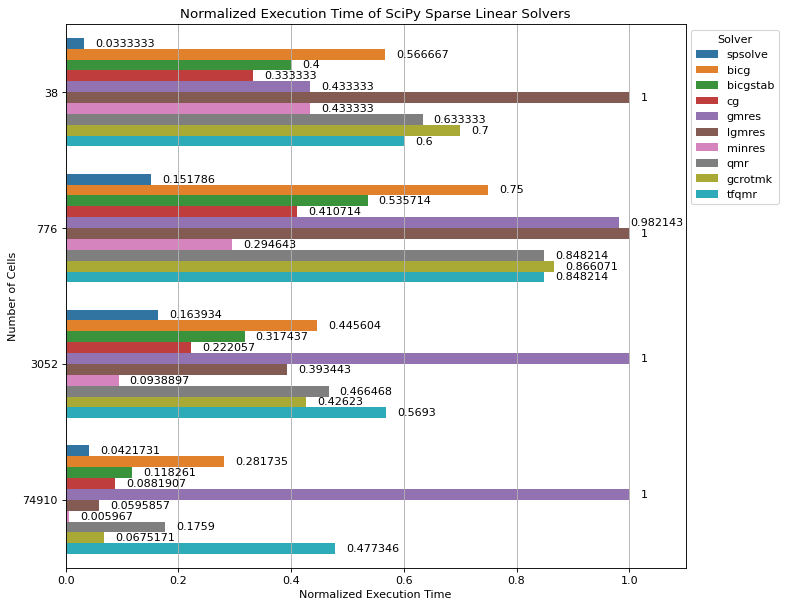

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 9), dpi=80, facecolor='w', edgecolor='r')

ax = sns.barplot(data=df_norm, y='Number of Cells', x='Normalized Execution Time', hue='Solver', orient='h')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
# sns.move_legend(ax, 'lower left', bbox_to_anchor=(0, 1, 1, 0))

for container in ax.containers:
    ax.bar_label(container, padding=10)

plt.grid(axis='x')
plt.xlim([0, 1.1])
plt.title(f'Normalized Execution Time of SciPy Sparse Linear Solvers')
plt.savefig(f'solvers_exec_time_cpu.png', bbox_inches='tight')
plt.savefig(f'solvers_exec_time_cpu.svg', bbox_inches='tight')
plt.savefig(f'solvers_exec_time_cpu.pdf', bbox_inches='tight')
plt.show()

In [ ]:
csv_data = \
"""Solver,lcar,n_nodes,Number of Cells,n_runs,CPU/GPU,Execution Time [s]
spsolve,0.5,29,38,10,GPU,0.0575
cg,0.5,29,38,10,GPU,0.0247
gmres,0.5,29,38,10,GPU,0.0143
minres,0.5,29,38,10,GPU,0.0238
spsolve,0.1,428,776,10,GPU,0.0161
cg,0.1,428,776,10,GPU,0.0374
gmres,0.1,428,776,10,GPU,0.0613
minres,0.1,428,776,10,GPU,0.0369
spsolve,0.05,1604,3052,10,GPU,0.0706
cg,0.05,1604,3052,10,GPU,0.0660
gmres,0.05,1604,3052,10,GPU,0.1726
minres,0.05,1604,3052,10,GPU,0.0457
spsolve,0.01,37836,74910,10,GPU,9.8619
cg,0.01,37836,74910,10,GPU,0.4239
gmres,0.01,37836,74910,10,GPU,4.3324
minres,0.01,37836,74910,10,GPU,0.0720
"""

In [ ]:
from io import StringIO
import pandas as pd

df_gpu = pd.read_csv(StringIO(csv_data), sep=',')
df_gpu

,Solver,lcar,n_nodes,Number of Cells,n_runs,CPU/GPU,Execution Time [s]
0,spsolve,0.50,29,38,10,GPU,0.0575
1,cg,0.50,29,38,10,GPU,0.0247
2,gmres,0.50,29,38,10,GPU,0.0143
3,minres,0.50,29,38,10,GPU,0.0238
4,spsolve,0.10,428,776,10,GPU,0.0161
5,cg,0.10,428,776,10,GPU,0.0374
6,gmres,0.10,428,776,10,GPU,0.0613
7,minres,0.10,428,776,10,GPU,0.0369
8,spsolve,0.05,1604,3052,10,GPU,0.0706
9,cg,0.05,1604,3052,10,GPU,0.0660


In [ ]:
df_norm_gpu = df_gpu.copy()

df_norm_gpu['Normalized Execution Time'] = df_norm_gpu['Execution Time [s]']
# NOTE: The cgs solver is just too much of an outsider, so we remove it
df_norm_gpu = df_norm_gpu.drop(df_norm_gpu[df_norm_gpu['Solver'] == 'cgs'].index)

for n_cells in df_norm_gpu['Number of Cells'].unique():
    selected_cells = df_norm_gpu['Number of Cells'] == n_cells
    exec_t = df_norm_gpu.loc[selected_cells, 'Execution Time [s]']
    max_t = df_norm_gpu.loc[selected_cells, 'Execution Time [s]'].max()
    # norm_exec_t = df_norm_gpu.loc[selected_cells, 'Normalized Execution Time']
    # norm_exec_t = exec_t / max_t
    # min_t = exec_t.min()
    # df_norm_gpu.loc[df_norm_gpu['Number of Cells'] == n_cells, 'Execution Time [s]'] = (df_norm_gpu.loc[df_norm_gpu['Number of Cells'] == n_cells, 'Execution Time [s]'] - min_t) / (max_t - min_t)
    df_norm_gpu.loc[df_norm_gpu['Number of Cells'] == n_cells, 'Normalized Execution Time'] /= max_t
df_norm_gpu

,Solver,lcar,n_nodes,Number of Cells,n_runs,CPU/GPU,Execution Time [s],Normalized Execution Time
0,spsolve,0.50,29,38,10,GPU,0.0575,1.000000
1,cg,0.50,29,38,10,GPU,0.0247,0.429565
2,gmres,0.50,29,38,10,GPU,0.0143,0.248696
3,minres,0.50,29,38,10,GPU,0.0238,0.413913
4,spsolve,0.10,428,776,10,GPU,0.0161,0.262643
5,cg,0.10,428,776,10,GPU,0.0374,0.610114
6,gmres,0.10,428,776,10,GPU,0.0613,1.000000
7,minres,0.10,428,776,10,GPU,0.0369,0.601958
8,spsolve,0.05,1604,3052,10,GPU,0.0706,0.409038
9,cg,0.05,1604,3052,10,GPU,0.0660,0.382387


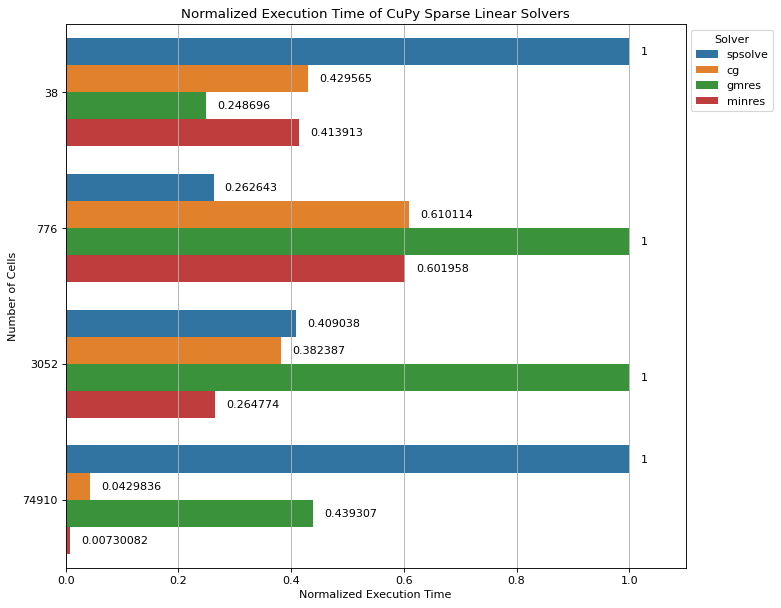

In [ ]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 9), dpi=80, facecolor='w', edgecolor='r')

ax = sns.barplot(data=df_norm_gpu, y='Number of Cells', x='Normalized Execution Time', hue='Solver', orient='h')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
# sns.move_legend(ax, 'lower left', bbox_to_anchor=(0, 1, 1, 0))

for container in ax.containers:
    ax.bar_label(container, padding=10)

plt.grid(axis='x')
plt.xlim([0, 1.1])
plt.title(f'Normalized Execution Time of CuPy Sparse Linear Solvers')
plt.savefig(f'solvers_exec_time_gpu.png', bbox_inches='tight')
plt.savefig(f'solvers_exec_time_gpu.svg', bbox_inches='tight')
plt.savefig(f'solvers_exec_time_gpu.pdf', bbox_inches='tight')
plt.show()

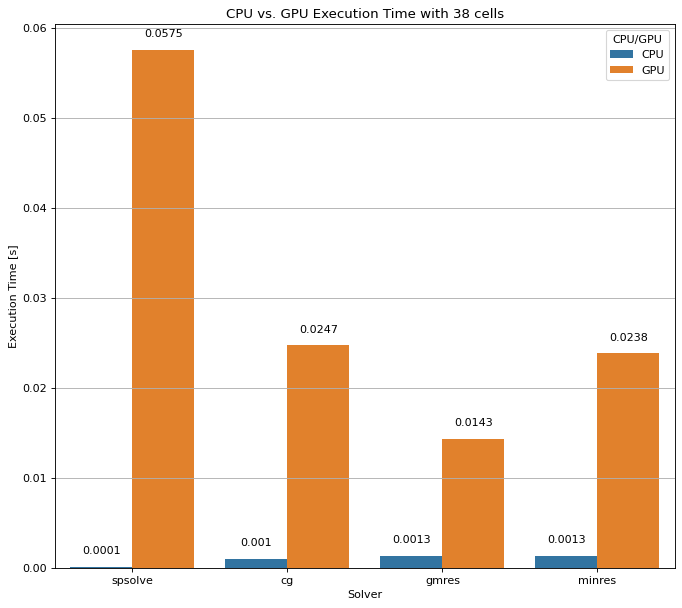

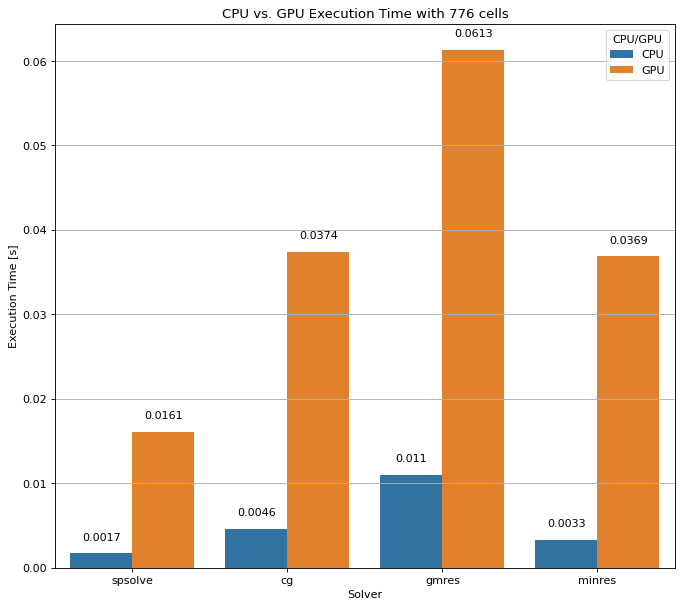

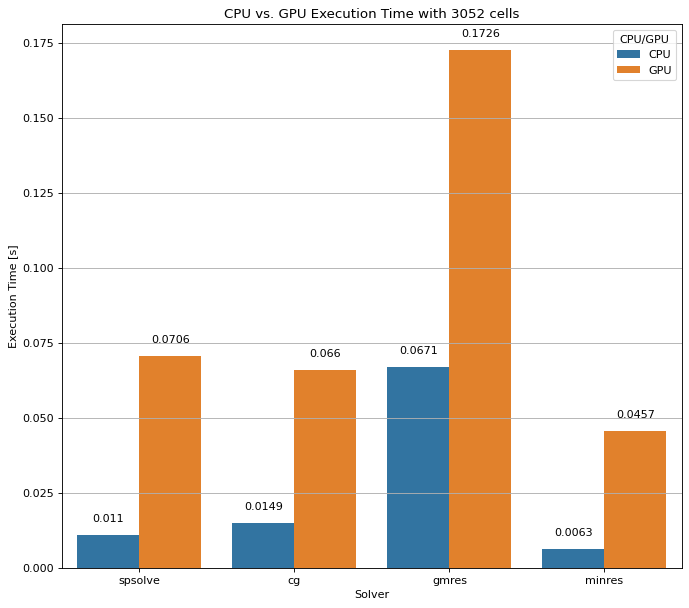

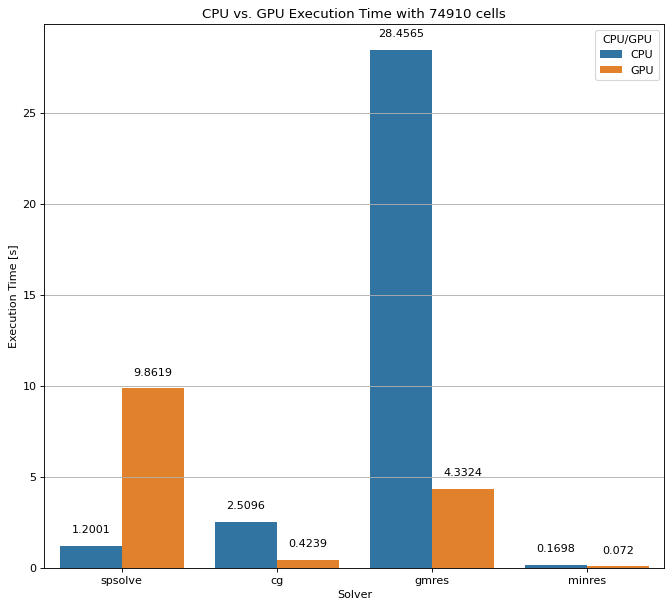

In [ ]:
df_tot = pd.concat([df, df_gpu])
for n_cells in df_tot['Number of Cells'].unique():
    df_tot = pd.concat([df, df_gpu])
    df_tot = df_tot[df_tot['Number of Cells'] == n_cells]
    gpu_solvers = df_tot.loc[df_tot['CPU/GPU'] == 'GPU', 'Solver'].unique()
    df_tot = df_tot[df_tot['Solver'].isin(gpu_solvers)]
    # df_tot['Solver'] = df_tot['Solver'] + ' (' + df_tot['cpu/gpu'] + ')'
    # df_tot['Execution Time [s]'] = round(df_tot['Execution Time [s]'], 2)

    figure(num=None, figsize=(10, 9), dpi=80, facecolor='w', edgecolor='r')

    # ax = sns.barplot(data=df_tot, y='Number of Cells', x='Execution Time [s]', hue='Solver', orient='h')
    ax = sns.barplot(data=df_tot, x='Solver', y='Execution Time [s]', hue='CPU/GPU')

    for container in ax.containers:
        ax.bar_label(container, padding=10)

    plt.grid(axis='y')
    plt.title(f'CPU vs. GPU Execution Time with {n_cells} cells')
    plt.savefig(f'solvers_exec_time_cpu_vs_gpu_c{n_cells}.png', bbox_inches='tight')
    plt.savefig(f'solvers_exec_time_cpu_vs_gpu_c{n_cells}.svg', bbox_inches='tight')
    plt.savefig(f'solvers_exec_time_cpu_vs_gpu_c{n_cells}.pdf', bbox_inches='tight')
    plt.show()
    print('')